<a href="https://colab.research.google.com/github/Alperhilmiates/Seaborn_and_Linear_Regression/blob/main/Seaborn_and_Linear_Regression_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [39]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [40]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [41]:
print(data.shape)
print(data.isna().values.any())
print(data.duplicated().values.any())
data.info()

(5391, 6)
False
False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [42]:
data['USD_Production_Budget']=data['USD_Production_Budget'].replace(regex=[','], value='')
data['USD_Production_Budget']=data['USD_Production_Budget'].replace(to_replace='[$]', value='', regex=True).astype(int)
data['USD_Worldwide_Gross']=data['USD_Worldwide_Gross'].replace(to_replace={'[$]',','},value='', regex=True).astype(int)
data['USD_Domestic_Gross']= data['USD_Domestic_Gross'].replace(to_replace={'[$]',','}, value='', regex=True).astype(int)

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [43]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'], format="%m/%d/%Y")
data['Release_Date']

0      1915-08-02
1      1916-05-09
2      1916-12-24
3      1920-09-17
4      1925-01-01
          ...    
5386   2018-10-08
5387   2018-12-18
5388   2020-12-31
5389   2020-12-31
5390   2020-12-31
Name: Release_Date, Length: 5391, dtype: datetime64[ns]

In [44]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [45]:
print(f"Average production budget: {round(data['USD_Production_Budget'].mean())}")
print(f"Average worldwide gross revenue: {round(data.USD_Worldwide_Gross.mean())}")
print(f"worldwide minimum: {data.USD_Worldwide_Gross.min()}, domestic minimum: {data.USD_Domestic_Gross.min()}")

Average production budget: 31113738
Average worldwide gross revenue: 88855422
worldwide minimum: 0, domestic minimum: 0


In [46]:
data_sorted = data.sort_values(by='USD_Worldwide_Gross', ascending=False)
# data_sorted[data_sorted['USD_Worldwide_Gross']<1000000]
bottom_25 = data_sorted.tail(1348)
bottom_25.USD_Worldwide_Gross.sum() - bottom_25.USD_Production_Budget.sum()

-7330797397

In [47]:
print(data[data.USD_Worldwide_Gross == data.USD_Worldwide_Gross.max()])
print(data[data.USD_Production_Budget == data.USD_Production_Budget.max()])

      Rank Release_Date Movie_Title  USD_Production_Budget  \
3529     1   2009-12-18      Avatar              425000000   

      USD_Worldwide_Gross  USD_Domestic_Gross  
3529           2783918982           760507625  
      Rank Release_Date Movie_Title  USD_Production_Budget  \
3529     1   2009-12-18      Avatar              425000000   

      USD_Worldwide_Gross  USD_Domestic_Gross  
3529           2783918982           760507625  


In [48]:
data[data.USD_Production_Budget == data.USD_Production_Budget.max()].USD_Worldwide_Gross

3529    2783918982
Name: USD_Worldwide_Gross, dtype: int64

In [49]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [50]:
print(f"#number of Films grossed $0 domestical: {data[data.USD_Domestic_Gross == 0].Rank.count()}")
domestic_zeros = data[data.USD_Domestic_Gross == 0]
domestic_zeros[domestic_zeros.USD_Production_Budget == domestic_zeros.USD_Production_Budget.max()]

#number of Films grossed $0 domestical: 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [51]:
worldwide_zeros = data[data.USD_Worldwide_Gross == 0]
print(f"Num of worldwide zeros: {worldwide_zeros.Rank.count()}")
worldwide_zeros[worldwide_zeros.USD_Production_Budget==worldwide_zeros.USD_Production_Budget.max() ]

Num of worldwide zeros: 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0


### Filtering on Multiple Conditions

In [52]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & (data.USD_Worldwide_Gross != 0)]
print(f"Number of international releases: {len(international_releases)}")
international_releases.head()                       

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [53]:
new_set = data.query("USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0") 
print(f"Number of international releases: {len(new_set)}")
new_set.head()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [54]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [55]:
# released_before_may5 = data.loc[data.Release_Date > scrape_date]
released_before_may5 = data[data.Release_Date > scrape_date]
print(f"Number of movies : {len(released_before_may5)}")
released_before_may5.head()

Number of movies : 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0


In [56]:
data_clean = data.drop(released_before_may5.index)
len(data_clean)

5384

In [57]:
data_clean_v2 = data[data.Release_Date < scrape_date]
len(data_clean_v2)

5384

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [58]:
data_clean.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,384.00","5,384.00","5,384.00","5,384.00"
mean,"2,698.11","31,038,476.84","88,970,947.21","41,289,131.75"
std,"1,555.79","40,440,041.47","168,536,755.89","66,055,507.64"
min,1.00,"1,100.00",0.00,0.00
25%,"1,351.75","5,000,000.00","3,929,036.00","1,354,765.25"
50%,"2,698.50","17,000,000.00","27,537,329.00","17,221,932.00"
75%,"4,045.25","40,000,000.00","96,641,996.25","52,403,530.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [59]:
more_than_zero = data_clean.loc[(data.USD_Worldwide_Gross - data.USD_Production_Budget)> 0]
round(len(more_than_zero) / len(data_clean),2)

0.63

In [60]:
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


# Seaborn for Data Viz: Bubble Charts

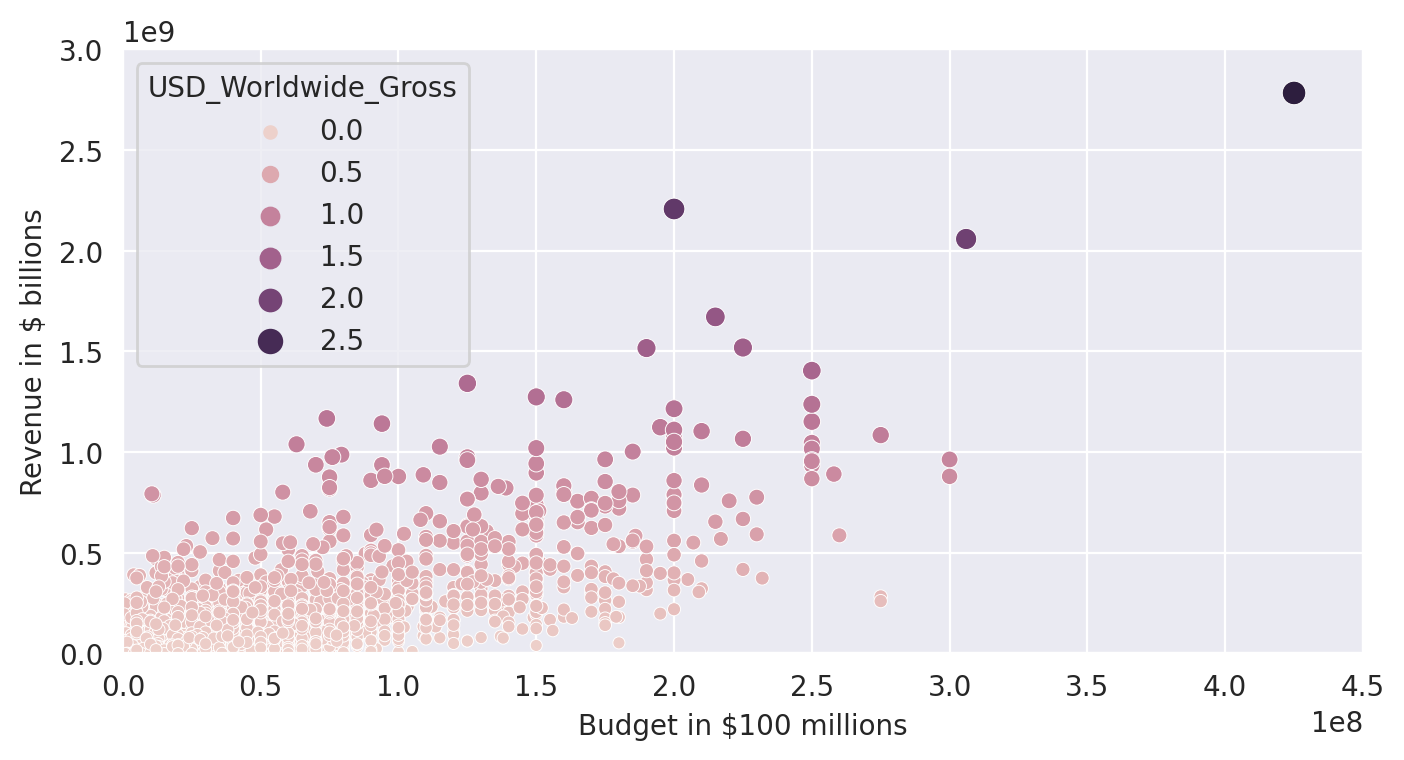

In [61]:
plt.figure(figsize=(8,4),dpi=200)
# set styling on a single chart like 'whitegrid'
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                x='USD_Production_Budget', 
                y='USD_Worldwide_Gross',
                hue='USD_Worldwide_Gross', # colour
                size='USD_Worldwide_Gross',) # dot size

  ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



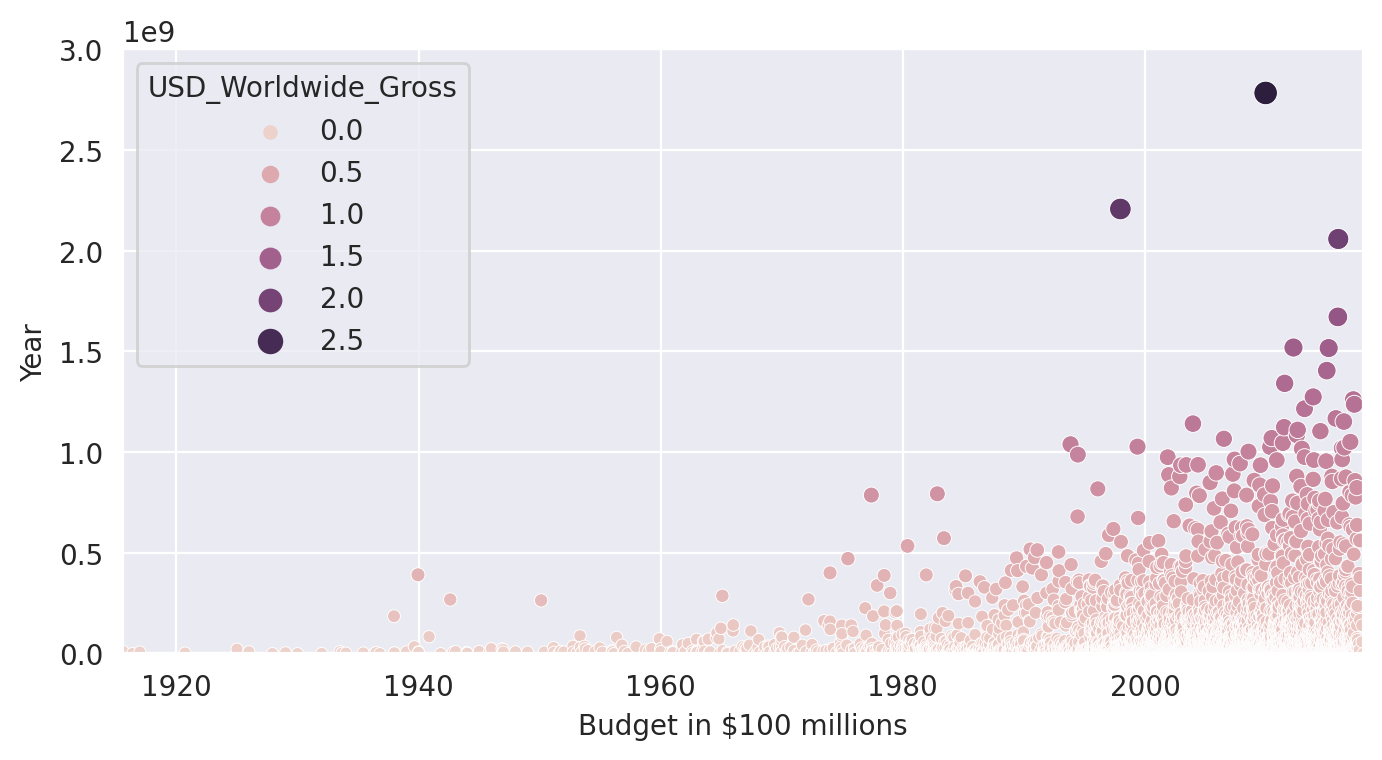

In [62]:
plt.figure(figsize=(8,4),dpi=200)
# set styling on a single chart like 'whitegrid'
with sns.axes_style('darkgrid'):
  ax2 = sns.scatterplot(data=data_clean,
                x='Release_Date', 
                y='USD_Worldwide_Gross',
                hue='USD_Worldwide_Gross', # colour
                size='USD_Worldwide_Gross',) # dot size
  ax2.set(ylim=(0, 3000000000),
          xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
       ylabel='Year',
       xlabel='Budget in $100 millions')
plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [63]:
data_clean.Release_Date[0].year//10
decades = []
for n in data_clean.Release_Date:
  year = int((n.year//10)*10)
  decades.append(year)
data_clean['Decade'] = decades
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [64]:
old_films = data_clean[data_clean.Decade<1970]
new_films = data_clean[data_clean.Decade>1960]
print(f"Number of films before 1970: {len(old_films)}")
print(f"Most expensive before 1970: {old_films.USD_Production_Budget.max()}")

Number of films before 1970: 153
Most expensive before 1970: 42000000


# Seaborn Regression Plots

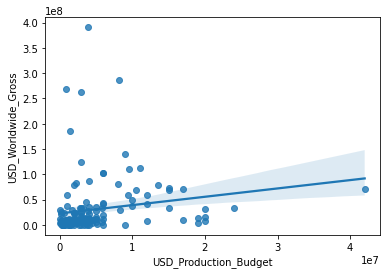

In [65]:
sns.regplot(data=old_films, 
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross')

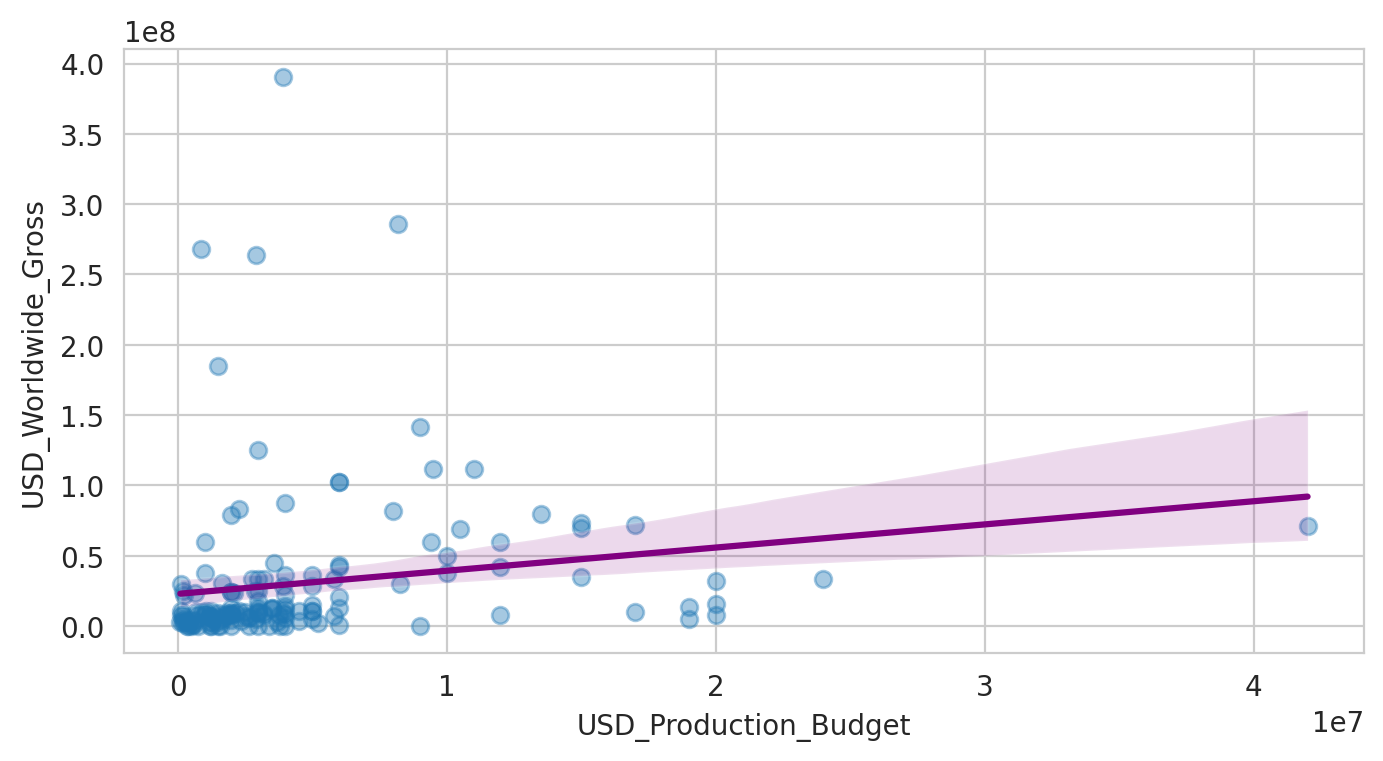

In [66]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'purple'})


**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

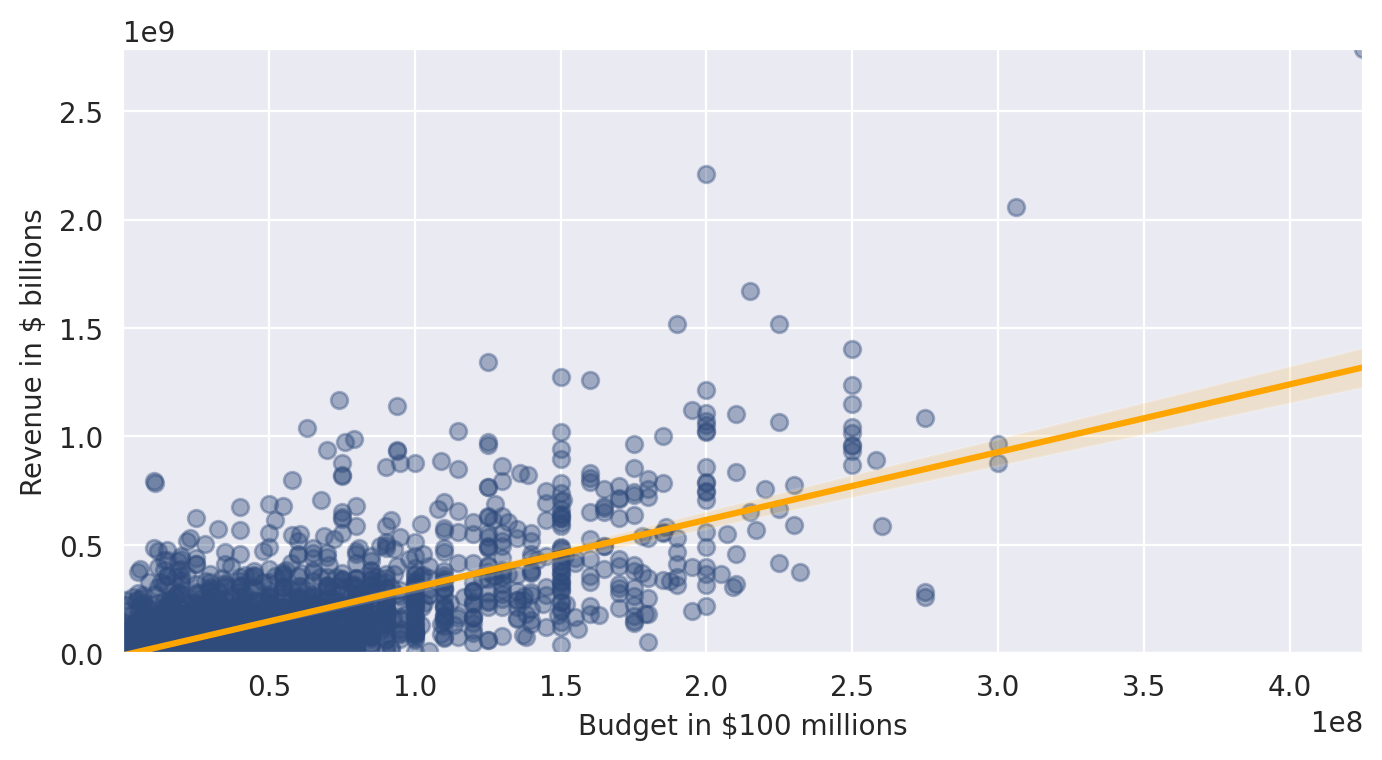

In [67]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
  ax3 = sns.regplot(data=new_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            color='#2f4b7c',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': "orange"})
  ax3.set( xlim=(new_films.USD_Production_Budget.min(), new_films.USD_Production_Budget.max()),
        ylim=(new_films.USD_Worldwide_Gross.min(), new_films.USD_Worldwide_Gross.max()),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')

In [68]:
regression = LinearRegression()

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [69]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 
regression.fit(X, y)
# Theta zero
regression.intercept_

array([-8650768.00661027])

In [70]:
regression.coef_

array([[3.12259592]])

In [71]:
regression.score(X, y)

0.5577032617720403

In [72]:
N = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
a = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross']) 
regression.fit(N, a)
print(regression.intercept_)
print(regression.coef_)
regression.score(N, a)

[22821538.63508039]
[[1.64771314]]


0.02937258620576877

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [73]:
revenue = regression.intercept_ + regression.coef_*350000000
print(revenue[0,0])
asa= round(revenue[0,0],-6)
print(asa)

599521139.0388364
600000000.0


In [74]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $600000000.0.
